In [10]:
#pip install ipython-autotime

time: 506 µs (started: 2023-01-16 05:52:45 +00:00)


In [11]:
#pip install ypstruct

time: 459 µs (started: 2023-01-16 05:52:45 +00:00)


In [12]:
#pip install ypstruct

time: 509 µs (started: 2023-01-16 05:52:45 +00:00)


In [13]:
#pip install ypstruct
# pip install -U memory_profiler
# pip install ipython-autotime
#%load_ext autotime
# %load_ext memory_profiler

time: 457 µs (started: 2023-01-16 05:52:45 +00:00)


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from ypstruct import structure

time: 3.18 ms (started: 2023-01-16 05:52:45 +00:00)


In [15]:
# mlp for multi-output regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense,Dropout, BatchNormalization
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
from tensorflow.keras.metrics import RootMeanSquaredError
from keras import backend as K
from sklearn.model_selection import KFold
import numpy as np
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from tensorflow import keras
import pickle 
import copy

time: 4.44 ms (started: 2023-01-16 05:52:45 +00:00)


In [16]:
# mlp for multi-output regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense,Dropout, BatchNormalization
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
from tensorflow.keras.metrics import RootMeanSquaredError
from keras import backend as K
from sklearn.model_selection import KFold
import matplotlib.ticker as ticker

time: 3.63 ms (started: 2023-01-16 05:52:45 +00:00)


In [17]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive
time: 3min 20s (started: 2023-01-16 05:52:45 +00:00)


In [18]:
cd /content/gdrive/MyDrive/Colab Notebooks/Surrogate Model

/content/gdrive/MyDrive/Colab Notebooks/Surrogate Model
time: 517 ms (started: 2023-01-16 05:56:06 +00:00)


In [19]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("./my_model",compile=False)

#load scaler
with open("my_scaler_x.pkl","rb") as f:
    loaded_scaler_x= pickle.load(f)

with open("my_scaler_y.pkl","rb") as f:
    loaded_scaler_y= pickle.load(f)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


time: 4.25 s (started: 2023-01-16 05:56:06 +00:00)


In [20]:
# def sphere(x):
#     return sum(x**4)


def obfunc ( arr ):
    arr = np.array(arr)
    arr=arr[np.newaxis,:]
    X_scaled= loaded_scaler_x.transform(arr)    
    predicted_y= loaded_scaler_y.inverse_transform(reconstructed_model.predict(X_scaled))
    
    return predicted_y[0,0]

#example = [25, 30, 3.5,  7. ,  0.2, 25. , 15. , 30.]
#obfunc(example)


time: 1.57 ms (started: 2023-01-16 05:56:11 +00:00)


Problem Definition

In [60]:
problem = structure()
problem.costfunc = obfunc
problem.nvar = 8
problem.varmin = [0, 25, 3, 1,  0.2, 13.5, 2, 15]
problem.varmax = [ 10, 45,  5.5,  5, 0.5, 15, 10, 30]

time: 2.15 ms (started: 2023-01-16 07:16:49 +00:00)


GA Parameters

In [61]:
params = structure()
params.maxit = 100
params.npop = 50
params.beta = 1
params.pc = 1
params.gamma = 0.01
params.mu = 0.01
params.sigma = 0.1

time: 1.65 ms (started: 2023-01-16 07:16:50 +00:00)


Run GA

In [62]:
# import sys
# sys.path.append('/content/drive/My Drive/Colab Notebooks/Genetic/draft3.ipynb')
import got

time: 668 µs (started: 2023-01-16 07:16:50 +00:00)


In [ ]:
out = got.run(problem, params)

Results

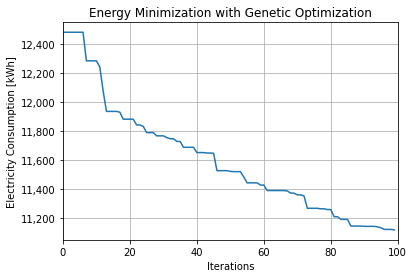

time: 295 ms (started: 2023-01-16 07:24:30 +00:00)


In [64]:
plt.plot(out.bestcost)
# plt.semilogy(out.bestcost)
plt.xlim(0, params.maxit)
plt.xlabel('Iterations')
plt.ylabel('Electricity Consumption [kWh]')
plt.title('Energy Minimization with Genetic Optimization')
plt.grid(True)

def format_kWh(x, pos):
    return '{:,.0f}'.format(x)

# Apply custom function to y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_kWh))

In [65]:
out['bestsol']

struct({'position': array([ 0.5186087 , 39.14410186,  5.49080739,  1.36104175,  0.20259098,
       14.6256934 ,  2.68841841, 20.03329145]), 'cost': 11121.515})

time: 11.3 ms (started: 2023-01-16 07:24:30 +00:00)


In [37]:
popula = out.pop
#popula

time: 714 µs (started: 2023-01-16 06:14:32 +00:00)


In [38]:
x, y= zip(*popula)

time: 846 µs (started: 2023-01-16 06:14:33 +00:00)


In [39]:
# arr =[]
# arr2 = []
# for x in popula:
#   arr.append(x['position'])
#   arr2.append(x['cost'])


time: 476 µs (started: 2023-01-16 06:14:33 +00:00)


In [30]:
# df = pd.DataFrame(arr)
# df['cost']=arr2
# df.corr().style.background_gradient(cmap='coolwarm')
# plt.matshow(df.corr())
# import seaborn as sns
# sns.pairplot(df)

time: 508 µs (started: 2023-01-16 06:03:38 +00:00)


time: 9.23 ms (started: 2023-01-16 06:03:38 +00:00)
